In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
# Read the data file
data_file = "data.txt"  # The path to the data
data = np.loadtxt(data_file)  # Load data assuming it's a one-column text file

# Split data into 100 parts
num_parts = 100
data_splits = np.array_split(data, num_parts)


In [24]:
# Create a parent directory to store all the datasets
parent_dir = "data_splits"
os.makedirs(parent_dir, exist_ok=True)

for i, split in enumerate(data_splits):
    dir_name = os.path.join(parent_dir, f"split_{i+1}")
    os.makedirs(dir_name, exist_ok=True)
    
    # Save the split data into a text file in the corresponding directory
    file_path = os.path.join(dir_name, f"split_{i+1}.txt")
    np.savetxt(file_path, split)


In [25]:
# File to store the results
output_file = os.path.join(parent_dir, "summary_stats.txt")

with open(output_file, "w") as f_out:
    f_out.write("Label, Mean, Variance, Standard Deviation, Mean Standard Deviation\n")
    
    for i, split in enumerate(data_splits):
        mean = np.mean(split)
        variance = np.var(split)
        stddev = np.std(split)
        mean_stddev = stddev / np.sqrt(len(split))  # Standard error of the mean
        
        # Write to file
        label = f"split_{i+1}"
        f_out.write(f"{label}, {mean:.5f}, {variance:.5f}, {stddev:.5f}, {mean_stddev:.5f}\n")


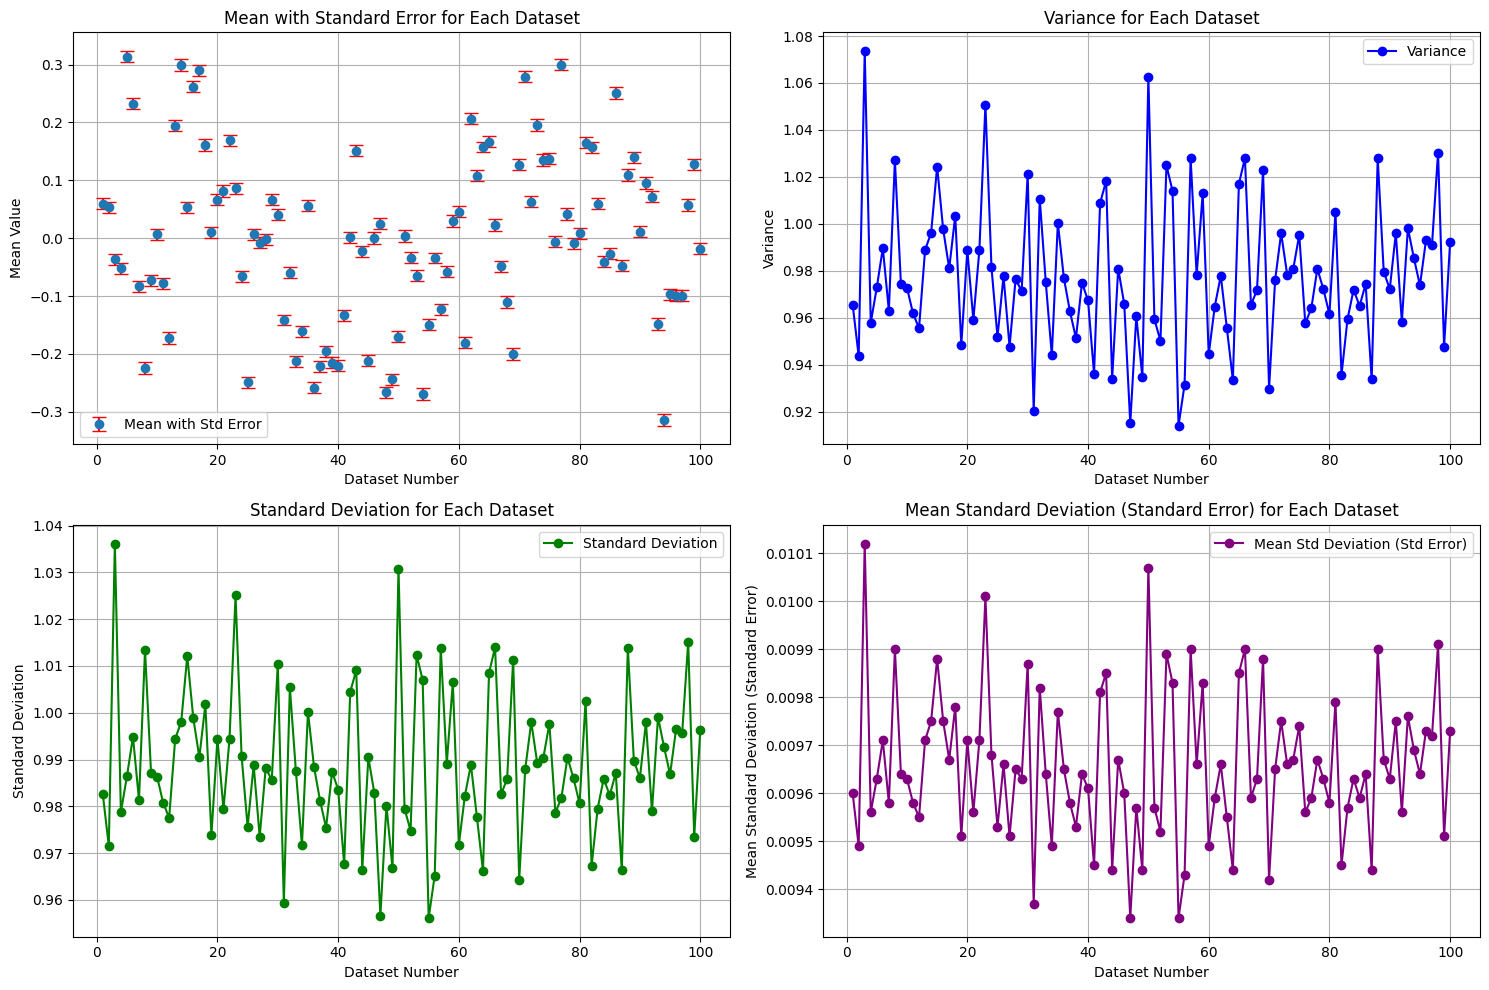

In [26]:
# Load the summary data for plotting from the text file
summary_stats = pd.read_csv(output_file, delimiter=',', skipinitialspace=True)

# Dataset numbers for x-axis
datasets = np.arange(1, num_parts + 1)

# Create plots for each requested statistic
plt.figure(figsize=(15, 10))

# Plot 1: Mean with Standard Error (Mean Standard Deviation)
plt.subplot(2, 2, 1)
plt.errorbar(
    datasets,
    summary_stats['Mean'],
    yerr=summary_stats['Mean Standard Deviation'],  # Error bars
    fmt='o', capsize=5, capthick=1, ecolor='red', label='Mean with Std Error'
)
plt.xlabel('Dataset Number')
plt.ylabel('Mean Value')
plt.title('Mean with Standard Error for Each Dataset')
plt.grid(True)
plt.legend()

# Plot 2: Variance vs Datasets
plt.subplot(2, 2, 2)
plt.plot(datasets, summary_stats['Variance'], 'o-', label='Variance', color='blue')
plt.xlabel('Dataset Number')
plt.ylabel('Variance')
plt.title('Variance for Each Dataset')
plt.grid(True)
plt.legend()

# Plot 3: Standard Deviation vs Datasets
plt.subplot(2, 2, 3)
plt.plot(datasets, summary_stats['Standard Deviation'], 'o-', label='Standard Deviation', color='green')
plt.xlabel('Dataset Number')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation for Each Dataset')
plt.grid(True)
plt.legend()

# Plot 4: Mean Standard Deviation (Standard Error) vs Datasets
plt.subplot(2, 2, 4)
plt.plot(datasets, summary_stats['Mean Standard Deviation'], 'o-', label='Mean Std Deviation (Std Error)', color='purple')
plt.xlabel('Dataset Number')
plt.ylabel('Mean Standard Deviation (Standard Error)')
plt.title('Mean Standard Deviation (Standard Error) for Each Dataset')
plt.grid(True)
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
